In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [2]:
import keras
from keras.layers import *
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)
print(Y_train.shape,Y_test.shape)
print(X_train.shape,X_test.shape)

(48000,) (12000,)
(48000, 28, 28) (12000, 28, 28)


In [4]:
import matplotlib.pyplot as plt
idx = np.random.randint(len(X_train))
Im = X_train[idx]
plt.figure()
plt.imshow(Im,cmap='gray')
plt.show()
print(Y_train[idx])

<Figure size 640x480 with 1 Axes>

9


In [5]:
from keras.models import Sequential
from keras.models import Model
# from keras.engine.input_layer import Input

inp = (28,28,1)

# model = Sequential()
inp = Input(shape=inp)
L1 = BatchNormalization()(inp)
L1 = Conv2D(8,(1,1),padding='same')(L1)
L1 = Activation('relu')(L1)
L1 = BatchNormalization()(L1)
L1 = Conv2D(8,(3,3),padding='same')(L1)
L1 = Activation('relu')(L1)
L1 = BatchNormalization()(L1)
L1 = MaxPool2D((2,2))(L1)

L2 = Conv2D(16,(1,1),padding='same')(L1)
L2 = Activation('relu')(L2)
L2 = BatchNormalization()(L2)

L2concat = Concatenate()([L1,L2])

L2 = Conv2D(24,(3,3),padding='same')(L2concat)
L2 = Activation('relu')(L2)
L2 = BatchNormalization()(L2)
L2 = MaxPool2D((2,2))(L2)

L3 = Conv2D(32,(1,1),padding='same')(L2)
L3 = Activation('relu')(L3)
L3 = BatchNormalization()(L3)

L3concat = Concatenate()([L2,L3])

L3 = Conv2D(64,(3,3),padding='same')(L3concat)
L3 = Activation('relu')(L3)
L3 = BatchNormalization()(L3)
L3 = MaxPool2D((2,2))(L3)

L4 = Conv2D(64,(1,1),padding='same')(L3)
L4 = Activation('relu')(L4)
L4 = BatchNormalization()(L4)

L4concat = Concatenate()([L3,L4])

L4 = Conv2D(128,(3,3),padding='same')(L4concat)
L4 = Activation('relu')(L4)
L4 = BatchNormalization()(L4)

L5 = GlobalMaxPooling2D()(L4)
FC1 = Dense(196,activation='relu')(L5)
FC2 = Dense(256,activation='relu')(FC1)

output = Dense(10,activation='softmax')(FC2)

model = Model(inp,output)

model.summary()








__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 8)    16          batch_normalization_1[0][0]      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 8)    0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
bat

In [7]:
import numpy as np

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1/255.,
    shear_range=0.15,
    zoom_range=0.2)

val_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(np.expand_dims(X_train,axis=-1))
val_gen.fit(np.expand_dims(X_test,axis=-1))

print(np.shape(np.expand_dims(X_train,axis=-1)))

(48000, 28, 28, 1)


In [9]:
import os
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=64),
                    steps_per_epoch=(len(X_train) // 64)+1, 
                    epochs=20, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=64),
                    validation_steps=(len(X_test)//64)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20


/home/sivananda/.local/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


751/751 [==============================] - 64s 85ms/step - loss: 0.1396 - acc: 0.9642 - val_loss: 0.2043 - val_acc: 0.9410
Epoch 2/20
751/751 [==============================] - 64s 86ms/step - loss: 0.0484 - acc: 0.9882 - val_loss: 0.3073 - val_acc: 0.9191
Epoch 3/20
751/751 [==============================] - 63s 84ms/step - loss: 0.0451 - acc: 0.9897 - val_loss: 0.1254 - val_acc: 0.9669
Epoch 4/20
751/751 [==============================] - 60s 80ms/step - loss: 0.0333 - acc: 0.9920 - val_loss: 0.1381 - val_acc: 0.9652
Epoch 5/20
751/751 [==============================] - 60s 80ms/step - loss: 0.0342 - acc: 0.9918 - val_loss: 0.0893 - val_acc: 0.9756
Epoch 6/20
751/751 [==============================] - 60s 80ms/step - loss: 0.0311 - acc: 0.9924 - val_loss: 0.1905 - val_acc: 0.9548
Epoch 7/20
751/751 [==============================] - 61s 81ms/step - loss: 0.0305 - acc: 0.9931 - val_loss: 0.1131 - val_acc: 0.9695
Epoch 8/20
751/751 [==============================] - 62s 82ms/step - los

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


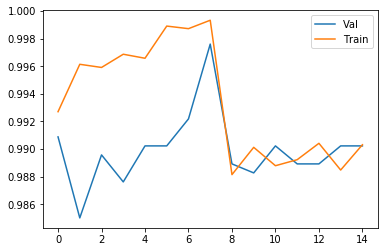

In [58]:
print(history.history.keys())
plt.plot(history.history['val_acc'],label="Val")
plt.plot(history.history['acc'],label="Train")
plt.legend()
plt.show()

In [11]:
# model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=256),
                    steps_per_epoch=(len(X_train) // 256)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=256),
                    validation_steps=(len(X_test)//256)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
188/188 [==============================] - 64s 341ms/step - loss: 0.0431 - acc: 0.9880 - val_loss: 0.1182 - val_acc: 0.9741
Epoch 2/15
188/188 [==============================] - 66s 349ms/step - loss: 0.0443 - acc: 0.9906 - val_loss: 0.0941 - val_acc: 0.9767
Epoch 3/15
188/188 [==============================] - 81s 429ms/step - loss: 0.0394 - acc: 0.9899 - val_loss: 0.0662 - val_acc: 0.9818
Epoch 4/15
188/188 [==============================] - 78s 417ms/step - loss: 0.0350 - acc: 0.9917 - val_loss: 0.0737 - val_acc: 0.9806
Epoch 5/15
188/188 [==============================] - 75s 398ms/step - loss: 0.0365 - acc: 0.9905 - val_loss: 0.0797 - val_acc: 0.9787
Epoch 6/15
188/188 [==============================] - 67s 355ms/step - loss: 0.0368 - acc: 0.9908 - val_loss: 0.0991 - val_acc: 0.9790
Epoch 7/15
188/188 [==============================] - 77s 411ms/step - loss: 0.0451 - acc: 0.9896 - val_loss: 0.0590 - val_acc: 0.9811
Epoch 8/15
188/188 [==============================] - 8

In [13]:
model.compile(keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=512),
                    steps_per_epoch=(len(X_train) // 512)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
94/94 [==============================] - 64s 679ms/step - loss: 0.0568 - acc: 0.9846 - val_loss: 0.0505 - val_acc: 0.9889
Epoch 2/15
94/94 [==============================] - 69s 731ms/step - loss: 0.0311 - acc: 0.9916 - val_loss: 0.0595 - val_acc: 0.9870
Epoch 3/15
94/94 [==============================] - 72s 761ms/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.0356 - val_acc: 0.9896
Epoch 4/15
94/94 [==============================] - 74s 790ms/step - loss: 0.0202 - acc: 0.9938 - val_loss: 0.0479 - val_acc: 0.9876
Epoch 5/15
94/94 [==============================] - 68s 726ms/step - loss: 0.0268 - acc: 0.9911 - val_loss: 0.0367 - val_acc: 0.9884
Epoch 6/15
94/94 [==============================] - 75s 796ms/step - loss: 0.0186 - acc: 0.9944 - val_loss: 0.0494 - val_acc: 0.9898
Epoch 7/15
94/94 [==============================] - 81s 857ms/step - loss: 0.0153 - acc: 0.9959 - val_loss: 0.0295 - val_acc: 0.9924
Epoch 8/15
94/94 [==============================] - 80s 849ms/step - 

In [15]:
model.compile(keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=1024),
                    steps_per_epoch=(len(X_train) // 1024)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
47/47 [==============================] - 82s 2s/step - loss: 0.0206 - acc: 0.9927 - val_loss: 0.0381 - val_acc: 0.9909
Epoch 2/15
47/47 [==============================] - 104s 2s/step - loss: 0.0140 - acc: 0.9961 - val_loss: 0.0588 - val_acc: 0.9850
Epoch 3/15
47/47 [==============================] - 82s 2s/step - loss: 0.0135 - acc: 0.9959 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 4/15
47/47 [==============================] - 86s 2s/step - loss: 0.0110 - acc: 0.9969 - val_loss: 0.0486 - val_acc: 0.9876
Epoch 5/15
47/47 [==============================] - 119s 3s/step - loss: 0.0094 - acc: 0.9966 - val_loss: 0.0310 - val_acc: 0.9902
Epoch 6/15
47/47 [==============================] - 138s 3s/step - loss: 0.0056 - acc: 0.9989 - val_loss: 0.0537 - val_acc: 0.9902
Epoch 7/15
47/47 [==============================] - 121s 3s/step - loss: 0.0062 - acc: 0.9987 - val_loss: 0.0306 - val_acc: 0.9922
Epoch 8/15
47/47 [==============================] - 124s 3s/step - loss: 0.0055 - acc:

In [16]:
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'))
model.save('/home/sivananda/MNIST/mnist2FC_concat.h5')

In [17]:

res = model.evaluate(np.expand_dims(x_val,axis=-1)/255.,y_val)
res

10000/10000 [==============================] - 9s 888us/step


[0.031972161490940336, 0.992]

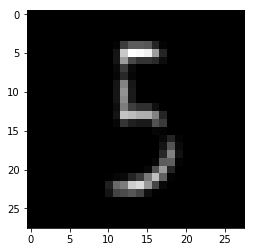

5


In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# model.load_weights('/home/sivananda/MNIST/stage_3_model.hdf5')
img = cv2.imread('/home/sivananda/Downloads/num5_p.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bit = cv2.bitwise_not(img)
_,img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
# img = cv2.medianBlur(img,5)
# img = cv2.resize(img,(28,28),interpolation = cv2.LINEAR)
# img = cv2.bilateralFilter(img,9,75,75)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.resize(img,(28,28))
inp = np.reshape(img, (1,28,28,1))/255.

plt.imshow(img,cmap='gray')
plt.show()
p1 = model.predict(inp)
# print(p)
print(np.argmax(p1))


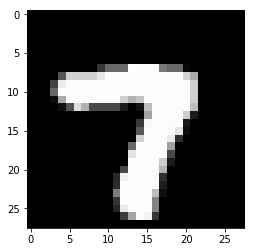

Pred:  7
Actual:  7
-----------------------------------


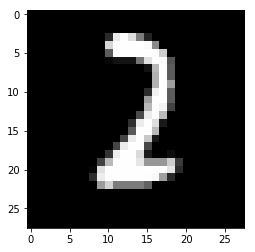

Pred:  2
Actual:  2
-----------------------------------


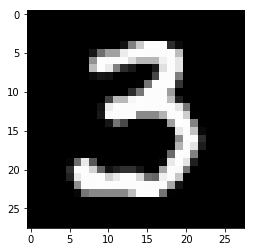

Pred:  3
Actual:  3
-----------------------------------


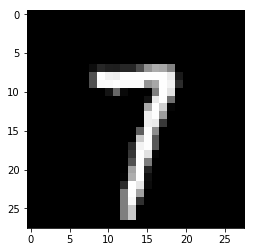

Pred:  7
Actual:  7
-----------------------------------


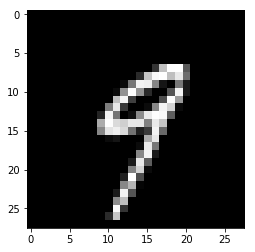

Pred:  9
Actual:  9
-----------------------------------


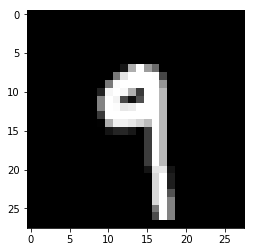

Pred:  9
Actual:  9
-----------------------------------


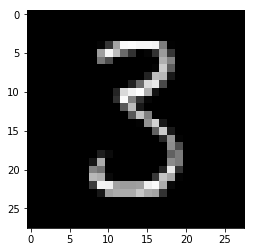

Pred:  3
Actual:  3
-----------------------------------


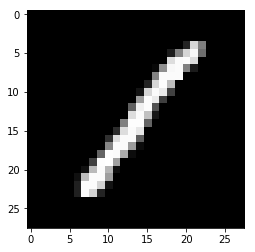

Pred:  1
Actual:  1
-----------------------------------


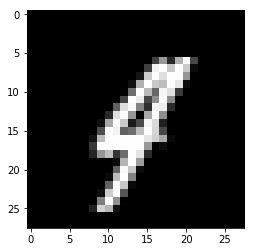

Pred:  4
Actual:  4
-----------------------------------


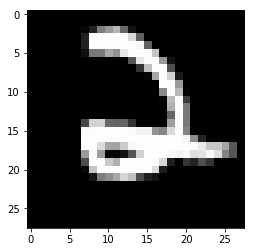

Pred:  2
Actual:  2
-----------------------------------


In [57]:
for i in range(10):
    idx = np.random.randint(len(x_val))
    img = x_val[idx]

    plt.imshow(img,cmap='gray')
    plt.show()

    inp = np.reshape(img,(1,28,28,1))/255.
    p1 = model.predict(inp)
    # print(p)
    print("Pred: ",np.argmax(p1))
    print("Actual: ", np.argmax(y_val[idx]))
    print("-----------------------------------")


In [6]:
model.load_weights('/home/sivananda/MNIST/mnist2FC_concat.h5')

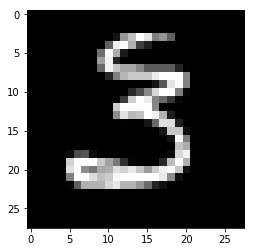

Pred:  3
Actual:  0


In [8]:
idx = 5878
# idx = np.random.randint(len(x_val))
img = x_val[idx]

plt.imshow(img,cmap='gray')
plt.show()

inp = np.reshape(img,(1,28,28,1))/255.
p1 = model.predict(inp)
# print(p)
print("Pred: ",np.argmax(p1))
print("Actual: ", np.argmax(y_val[idx]))